In [303]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np


%matplotlib inline

In [304]:
# 데이터 로드
train = pd.read_csv('./train_job/train.csv')
user_tags = pd.read_csv('./train_job/user_tags.csv')
job_tags = pd.read_csv('./train_job/job_tags.csv')
tags = pd.read_csv('./train_job/tags.csv')
job_companies = pd.read_csv('./train_job/job_companies.csv')

In [200]:
print(list(train.columns))

['userID', 'jobID', 'applied']


In [201]:
print(list(user_tags.columns))

['userID', 'tagID']


In [202]:
print(list(job_tags.columns))

['jobID', 'tagID']


In [203]:
print(list(tags.columns))

['tagID', 'keyword']


In [204]:
print(list(job_companies.columns))

['companyID', 'jobID', 'companySize']


In [205]:
# 결측값 확인
train.isnull().sum()

userID     0
jobID      0
applied    0
dtype: int64

In [206]:
user_tags.isnull().sum()

userID    0
tagID     0
dtype: int64

In [207]:
job_tags.isnull().sum()

jobID    0
tagID    0
dtype: int64

In [208]:
tags.isnull().sum()

tagID      0
keyword    0
dtype: int64

In [209]:
job_companies.isnull().sum() # 'companySize' 속성에 결측값 많음

companyID       0
jobID           0
companySize    90
dtype: int64

In [210]:
# 상위 데이터 확인
train.head()

,userID,jobID,applied
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0


In [211]:
user_tags.head()

,userID,tagID
0,e576423831e043f7928d9ac113abbe6f,82c2559140b95ccda9c6ca4a8b981f1e
1,e576423831e043f7928d9ac113abbe6f,2ba8698b79439589fdd2b0f7218d8b07
2,e576423831e043f7928d9ac113abbe6f,351b33587c5fdd93bd42ef7ac9995a28
3,e576423831e043f7928d9ac113abbe6f,81e5f81db77c596492e6f1a5a792ed53
4,e576423831e043f7928d9ac113abbe6f,0e095e054ee94774d6a496099eb1cf6a


In [212]:
job_tags.head()

,jobID,tagID
0,320722549d1751cf3f247855f937b982,d38901788c533e8286cb6400b40b386d
1,e744f91c29ec99f0e662c9177946c627,3948ead63a9f2944218de038d8934305
2,e744f91c29ec99f0e662c9177946c627,0e095e054ee94774d6a496099eb1cf6a
3,e820a45f1dfc7b95282d10b6087e11c0,7d771e0e8f3633ab54856925ecdefc5d
4,e820a45f1dfc7b95282d10b6087e11c0,6c8dba7d0df1c4a79dd07646be9a26c8


In [213]:
tags.head()

,tagID,keyword
0,602d1305678a8d5fdb372271e980da6a,Amazon Web Services(AWS)
1,e3251075554389fe91d17a794861d47b,Tensorflow
2,a1d50185e7426cbb0acad1e6ca74b9aa,Docker
3,884d79963bd8bc0ae9b13a1aa71add73,Git
4,4122cb13c7a474c1976c9706ae36521d,Python


In [214]:
job_companies.head()

,companyID,jobID,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN
1,1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
2,89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
3,acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10
4,fb7b9ffa5462084c5f4e7e85a093e6d7,efe937780e95574250dabe07151bdc23,NaN


In [215]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   userID   6000 non-null   object
 1   jobID    6000 non-null   object
 2   applied  6000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 140.8+ KB


In [216]:
user_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17194 entries, 0 to 17193
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userID  17194 non-null  object
 1   tagID   17194 non-null  object
dtypes: object(2)
memory usage: 268.8+ KB


In [217]:
job_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   jobID   3477 non-null   object
 1   tagID   3477 non-null   object
dtypes: object(2)
memory usage: 54.5+ KB


In [218]:
# 컬럼 하나씩 보기
train['jobID'].value_counts()

96b9bff013acedfb1d140579e2fbeb63    50
da0d1111d2dc5d489242e60ebcbaf988    50
0f840be9b8db4d3fbd5ba2ce59211f55    48
69cb3ea317a32c4e6143e665fdb20b14    44
e5f6ad6ce374177eef023bf5d0c018b6    42
                                    ..
a58149d355f02887dfbe55ebb2b64ba3     1
f29b38f160f87ae86df31cee1982066f     1
df7f28ac89ca37bf1abd2f6c184fe1cf     1
addfa9b7e234254d26e9c7f2af1005cb     1
bb04af0f7ecaee4aae62035497da1387     1
Name: jobID, Length: 708, dtype: int64

In [219]:
train['jobID'].value_counts(normalize=True)*100 # 공고('jobID') 별 인기는 약 8배까지 차이 남

96b9bff013acedfb1d140579e2fbeb63    0.833333
da0d1111d2dc5d489242e60ebcbaf988    0.833333
0f840be9b8db4d3fbd5ba2ce59211f55    0.800000
69cb3ea317a32c4e6143e665fdb20b14    0.733333
e5f6ad6ce374177eef023bf5d0c018b6    0.700000
                                      ...   
a58149d355f02887dfbe55ebb2b64ba3    0.016667
f29b38f160f87ae86df31cee1982066f    0.016667
df7f28ac89ca37bf1abd2f6c184fe1cf    0.016667
addfa9b7e234254d26e9c7f2af1005cb    0.016667
bb04af0f7ecaee4aae62035497da1387    0.016667
Name: jobID, Length: 708, dtype: float64

In [220]:
job_tags['jobID'].value_counts() # 같은 공고가 여러번 있음 ??

e17184bcb70dcf3942c54e0b537ffc6d    17
535ab76633d94208236a2e829ea6d888    16
27ed0fb950b856b06e1273989422e7d3    16
68d13cf26c4b4f4f932e3eff990093ba    15
4fac9ba115140ac4f1c22da82aa0bc7f    13
                                    ..
7bb060764a818184ebb1cc0d43d382aa     1
05f971b5ec196b8c65b75d2ef8267331     1
c203d8a151612acf12457e4d67635a95     1
285f89b802bcb2651801455c86d78f2a     1
c5ff2543b53f4cc0ad3819a36752467b     1
Name: jobID, Length: 733, dtype: int64

In [221]:
job_tags['tagID'].value_counts()

0e095e054ee94774d6a496099eb1cf6a    219
f47330643ae134ca204bf6b2481fec47    197
4122cb13c7a474c1976c9706ae36521d    187
3948ead63a9f2944218de038d8934305    153
c8ba76c279269b1c6bc8a07e38e78fa4    143
                                   ... 
41bfd20a38bb1b0bec75acf0845530a7      1
b710915795b9e9c02cf10d6d2bdb688c      1
372d3f309fef061977fb2f7ba36d74d2      1
f3173935ed8ac4bf073c1bcd63171f8a      1
06eb61b839a0cefee4967c67ccb099dc      1
Name: tagID, Length: 240, dtype: int64

In [222]:
job_tags['tagID'].value_counts(normalize=True)*100 # 공고job 별 관심사('tagID')는 차이가 더 큼

0e095e054ee94774d6a496099eb1cf6a    6.298533
f47330643ae134ca204bf6b2481fec47    5.665804
4122cb13c7a474c1976c9706ae36521d    5.378200
3948ead63a9f2944218de038d8934305    4.400345
c8ba76c279269b1c6bc8a07e38e78fa4    4.112741
                                      ...   
41bfd20a38bb1b0bec75acf0845530a7    0.028760
b710915795b9e9c02cf10d6d2bdb688c    0.028760
372d3f309fef061977fb2f7ba36d74d2    0.028760
f3173935ed8ac4bf073c1bcd63171f8a    0.028760
06eb61b839a0cefee4967c67ccb099dc    0.028760
Name: tagID, Length: 240, dtype: float64

In [223]:
len(user_tags['userID'].unique()) # 중복 제외하면 '개발자'는 총 196 명 (데이터는 총 17194 개)

196

In [224]:
len(user_tags['tagID'].unique()) # 중복 제외하면 '관심사'는 총 345 개 (데이터는 총 17194 개)

345

In [225]:
user_tags['tagID'].value_counts()

f47330643ae134ca204bf6b2481fec47    820
0e095e054ee94774d6a496099eb1cf6a    796
c8ba76c279269b1c6bc8a07e38e78fa4    701
2ba8698b79439589fdd2b0f7218d8b07    564
3948ead63a9f2944218de038d8934305    516
                                   ... 
6d3a1e06d6a06349436bc054313b648c      1
0a09c8844ba8f0936c20bd791130d6b6      1
5fa9e41bfec0725742cc9d15ef594120      1
fae0b27c451c728867a567e8c1bb4e53      1
1a0a283bfe7c549dee6c638a05200e32      1
Name: tagID, Length: 345, dtype: int64

In [226]:
user_tags['tagID'].value_counts(normalize=True)*100 # 개발자user 별 관심사('tagID')도 차이 큼

f47330643ae134ca204bf6b2481fec47    4.769106
0e095e054ee94774d6a496099eb1cf6a    4.629522
c8ba76c279269b1c6bc8a07e38e78fa4    4.077004
2ba8698b79439589fdd2b0f7218d8b07    3.280214
3948ead63a9f2944218de038d8934305    3.001047
                                      ...   
6d3a1e06d6a06349436bc054313b648c    0.005816
0a09c8844ba8f0936c20bd791130d6b6    0.005816
5fa9e41bfec0725742cc9d15ef594120    0.005816
fae0b27c451c728867a567e8c1bb4e53    0.005816
1a0a283bfe7c549dee6c638a05200e32    0.005816
Name: tagID, Length: 345, dtype: float64

In [227]:
user_tags['userID'].value_counts() # 중복 지원한 '개발자' 있음 => 최대 572 번 지원??

f69054686ba46877b6397ccdb8f51762    572
eeedf6d4d717eba333e1b53f1b5375c8    447
0cc8f7bf8a8d56980414a6e4bc69cdc6    358
87c0a904d6f959e5ecbd0bdaa29d8be9    336
5585082ed1ea25eaf73052029f2161ce    325
                                   ... 
37b96469b46dfd9919cd984b788ceb17      5
68a61f9415f07a4040f7afe82a058608      5
4611b8ff403bea67637c3f1911940668      5
15d84e9a5eceb67bcb8fb0e8c839a903      5
4802630177809fcf861411501a443abb      4
Name: userID, Length: 196, dtype: int64

In [228]:
# reset_index()
#train2 = train('userID').reset_index()
#train2

In [305]:
# 데이터 결합
for uID, tID in zip(user_tags['userID'].values, user_tags['tagID'].values):
    train.loc[(train['userID'] == uID), 'applicated_user_tags'] = tID

In [230]:
train

,userID,jobID,applied,applicated_user_tags
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,4122cb13c7a474c1976c9706ae36521d
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,fe70c36866add1572a8e2b96bfede7bf
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,f91e24dfe80012e2a7984afa4480a6d6
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,3948ead63a9f2944218de038d8934305
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,81e5f81db77c596492e6f1a5a792ed53
...,...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0,c88d8d0a6097754525e02c2246d8d27f
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0,7bccfde7714a1ebadf06c5f4cea752c1
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0,f47330643ae134ca204bf6b2481fec47
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0,884d79963bd8bc0ae9b13a1aa71add73


In [231]:
train['applicated_user_tags'].isnull().sum() ## okay !

0

In [306]:
for jID, tID in zip(job_tags['jobID'].values, job_tags['tagID'].values):
    train.loc[(train['jobID'] == jID), 'applicated_job_tags'] = tID

In [233]:
train

,userID,jobID,applied,applicated_user_tags,applicated_job_tags
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,4122cb13c7a474c1976c9706ae36521d,d38901788c533e8286cb6400b40b386d
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,fe70c36866add1572a8e2b96bfede7bf,c8ba76c279269b1c6bc8a07e38e78fa4
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,f91e24dfe80012e2a7984afa4480a6d6,6eb6e75fddec0218351dc5c0c8464104
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,3948ead63a9f2944218de038d8934305,6c8dba7d0df1c4a79dd07646be9a26c8
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,81e5f81db77c596492e6f1a5a792ed53,8e2cfdc275761edc592f73a076197c33
...,...,...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0,c88d8d0a6097754525e02c2246d8d27f,0e095e054ee94774d6a496099eb1cf6a
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0,7bccfde7714a1ebadf06c5f4cea752c1,0e095e054ee94774d6a496099eb1cf6a
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0,f47330643ae134ca204bf6b2481fec47,4e2545f819e67f0615003dd7e04a6087
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0,884d79963bd8bc0ae9b13a1aa71add73,8e2cfdc275761edc592f73a076197c33


In [234]:
train['applicated_job_tags'].isnull().sum() ## okay !

0

In [307]:
for cID, jID in zip(job_companies['companyID'].values, job_companies['jobID'].values):
    train.loc[(train['jobID'] == jID), 'applicated_job_company'] = cID

In [236]:
train

,userID,jobID,applied,applicated_user_tags,applicated_job_tags,applicated_job_company
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,4122cb13c7a474c1976c9706ae36521d,d38901788c533e8286cb6400b40b386d,4f6ffe13a5d75b2d6a3923922b3922e5
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,fe70c36866add1572a8e2b96bfede7bf,c8ba76c279269b1c6bc8a07e38e78fa4,846c260d715e5b854ffad5f70a516c88
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,f91e24dfe80012e2a7984afa4480a6d6,6eb6e75fddec0218351dc5c0c8464104,edfbe1afcf9246bb0d40eb4d8027d90f
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,3948ead63a9f2944218de038d8934305,6c8dba7d0df1c4a79dd07646be9a26c8,884d79963bd8bc0ae9b13a1aa71add73
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,81e5f81db77c596492e6f1a5a792ed53,8e2cfdc275761edc592f73a076197c33,b5dc4e5d9b495d0196f61d45b26ef33e
...,...,...,...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0,c88d8d0a6097754525e02c2246d8d27f,0e095e054ee94774d6a496099eb1cf6a,17c276c8e723eb46aef576537e9d56d0
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0,7bccfde7714a1ebadf06c5f4cea752c1,0e095e054ee94774d6a496099eb1cf6a,68ce199ec2c5517597ce0a4d89620f55
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0,f47330643ae134ca204bf6b2481fec47,4e2545f819e67f0615003dd7e04a6087,43dd49b4fdb9bede653e94468ff8df1e
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0,884d79963bd8bc0ae9b13a1aa71add73,8e2cfdc275761edc592f73a076197c33,f33ba15effa5c10e873bf3842afb46a6


In [237]:
train['applicated_job_company'].isnull().sum() ## okay !

0

In [238]:
# test 데이터 불러오기 및 합치기

In [308]:
test = pd.read_csv('test_job.csv')

In [309]:
# 데이터 결합
for uID, tID in zip(user_tags['userID'].values, user_tags['tagID'].values):
    test.loc[(test['userID'] == uID), 'applicated_user_tags'] = tID

In [310]:
for jID, tID in zip(job_tags['jobID'].values, job_tags['tagID'].values):
    test.loc[(test['jobID'] == jID), 'applicated_job_tags'] = tID

In [311]:
for cID, jID in zip(job_companies['companyID'].values, job_companies['jobID'].values):
    test.loc[(test['jobID'] == jID), 'applicated_job_company'] = cID

In [312]:
test

,userID,jobID,applicated_user_tags,applicated_job_tags,applicated_job_company
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885,1e1d184167ca7676cf665225e236a3d2,cd758e8f59dfdf06a852adad277986ca,b51a15f382ac914391a58850ab343b00
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63,e702e51da2c0f5be4dd354bb3e295d37,9701a1c165dd9420816bfec5edd6c2b1,9f396fe44e7c05c16873b05ec425cbad
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087,7d771e0e8f3633ab54856925ecdefc5d,cd758e8f59dfdf06a852adad277986ca,68053af2923e00204c3ca7c6a3150cf7
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f,2ba8698b79439589fdd2b0f7218d8b07,0e095e054ee94774d6a496099eb1cf6a,3b5dca501ee1e6d8cd7b905f4e1bf723
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4,4e2545f819e67f0615003dd7e04a6087,884d79963bd8bc0ae9b13a1aa71add73,d961e9f236177d65d21100592edb0769
...,...,...,...,...,...
2430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88,2ba8698b79439589fdd2b0f7218d8b07,4122cb13c7a474c1976c9706ae36521d,3b8a614226a953a8cd9526fca6fe9ba5
2431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0,8a3363abe792db2d8761d6403605aeb7,8a3363abe792db2d8761d6403605aeb7,d7322ed717dedf1eb4e6e52a37ea7bcd
2432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9,bd4c9ab730f5513206b999ec0d90d1fb,38ca89564b2259401518960f7a06f94b,7b5b23f4aadf9513306bcd59afb6e4c9
2433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca,8a3363abe792db2d8761d6403605aeb7,9a3d458322d70046f63dfd8b0153ece4,ec8ce6abb3e952a85b8551ba726a1227


In [313]:
test['applicated_user_tags'].isnull().sum() ## okay !

0

In [314]:
test['applicated_job_tags'].isnull().sum() ## okay !

0

In [315]:
test['applicated_job_company'].isnull().sum() ## okay !

0

In [316]:
# 모델링
train.info() # 현재 지원여부('applied')는 int64 type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   userID                  6000 non-null   object
 1   jobID                   6000 non-null   object
 2   applied                 6000 non-null   int64 
 3   applicated_user_tags    6000 non-null   object
 4   applicated_job_tags     6000 non-null   object
 5   applicated_job_company  6000 non-null   object
dtypes: int64(1), object(5)
memory usage: 281.4+ KB


In [317]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   userID                  2435 non-null   object
 1   jobID                   2435 non-null   object
 2   applicated_user_tags    2435 non-null   object
 3   applicated_job_tags     2435 non-null   object
 4   applicated_job_company  2435 non-null   object
dtypes: object(5)
memory usage: 95.2+ KB


- CSV 파일 새로 만들어주기
submit2 = pd.DataFrame(pred)
submit2.to_csv('lgbm_model_submission.csv', header = True, index=False)

In [322]:
from sklearn.preprocessing import LabelEncoder

In [323]:
# object 변수들 -> float or boolean 으로 바꿔주기
# 범주형 변수 -> 숫자 형태로 인코딩

LE = LabelEncoder()

LE.fit(list(train['userID'])+list(test['userID']))
train['userID'] = LE.transform(train['userID'])
test['userID'] = LE.transform(test['userID'])

LE.fit(list(train['jobID'])+list(test['jobID']))
train['jobID'] = LE.transform(train['jobID'])
test['jobID'] = LE.transform(test['jobID'])

LE.fit(list(train['applicated_user_tags'])+list(test['applicated_user_tags']))
train['applicated_user_tags'] = LE.transform(train['applicated_user_tags'])
test['applicated_user_tags'] = LE.transform(test['applicated_user_tags'])

LE.fit(list(train['applicated_job_tags'])+list(test['applicated_job_tags']))
train['applicated_job_tags'] = LE.transform(train['applicated_job_tags'])
test['applicated_job_tags'] = LE.transform(test['applicated_job_tags'])

LE.fit(list(train['applicated_job_company'])+list(test['applicated_job_company']))
train['applicated_job_company'] = LE.transform(train['applicated_job_company'])
test['applicated_job_company'] = LE.transform(test['applicated_job_company'])

In [191]:
!pip install --upgrade pip xgboost

     |████████████████████████████████| 1.5 MB 2.0 MB/s eta 0:00:01
Requirement already up-to-date: xgboost in /Users/hyun/opt/anaconda3/lib/python3.8/site-packages (1.3.0.post0)
  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4


In [195]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

In [332]:
# Binary Classifier 모델로 다시

# 데이터 결합
drop_column = ['applied']

X_data = train.drop(drop_column, axis=1)
y_data = train['applied'].values

X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [333]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [259]:
# 임포트
# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection


ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
#xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

- 리스트 준비
models = [ran, knn, log, gbc, svc, ext, ada, gnb, gpc, bag]   # xgb 뺌      
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores = {}

- 이어서 연속적으로 모델을 학습 시키고 교차 검증합니다.
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores[model_names[ind]] = acc

In [334]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()


# 리스트 준비
models = [ran, knn, log]  
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression'] 

# 이어서 연속적으로 모델을 학습 시키고 교차 검증합니다.
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores[model_names[ind]] = acc

In [328]:
# 결과 테이블을 만듭니다.
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
XGBoost,0.853333,0.855000,0.860000,0.856667,0.870000,0.851667,0.853333,0.856667,0.855000,0.863333,0.857500
Logistic Regression,0.858333,0.858333,0.858333,0.856667,0.856667,0.856667,0.856667,0.856667,0.856667,0.856667,0.857167
Gradient Boosting,0.858333,0.858333,0.858333,0.856667,0.856667,0.856667,0.856667,0.856667,0.856667,0.856667,0.857167
AdaBoost,0.858333,0.858333,0.858333,0.856667,0.856667,0.856667,0.856667,0.856667,0.856667,0.856667,0.857167
Extra Trees,0.853333,0.858333,0.860000,0.855000,0.856667,0.858333,0.856667,0.858333,0.855000,0.855000,0.856667
Random Forest,0.853333,0.858333,0.846667,0.855000,0.870000,0.851667,0.846667,0.848333,0.845000,0.851667,0.852667
SVC,0.850000,0.841667,0.843333,0.845000,0.868333,0.853333,0.843333,0.850000,0.850000,0.848333,0.849333
K Nearest Neighbour,0.831667,0.845000,0.838333,0.843333,0.846667,0.838333,0.841667,0.856667,0.850000,0.846667,0.843833


findfont: Font family ['Hancom Gothic'] not found. Falling back to DejaVu Sans.


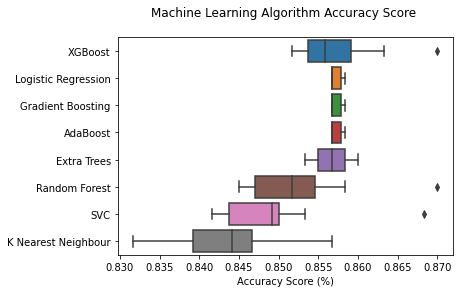

In [263]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

In [ ]:
# 대안 1) Logistic_Regression => 점수: 33.26488706365503

In [269]:
pred = log.predict(final_test)

In [277]:
submit2 = pd.DataFrame(pred, columns=['applied'])
submit2.to_csv('Logistic_Regression_submission.csv', header = True, index=False)

In [ ]:
# 대안 2) Random_Forest_Classifier => 점수: 85.62628336755647

In [335]:
pred2 = ran.predict(final_test)

In [336]:
submit3 = pd.DataFrame(pred2, columns=['applied'])
submit3.to_csv('Random_Forest_Classifier_submission.csv', header = True, index=False)

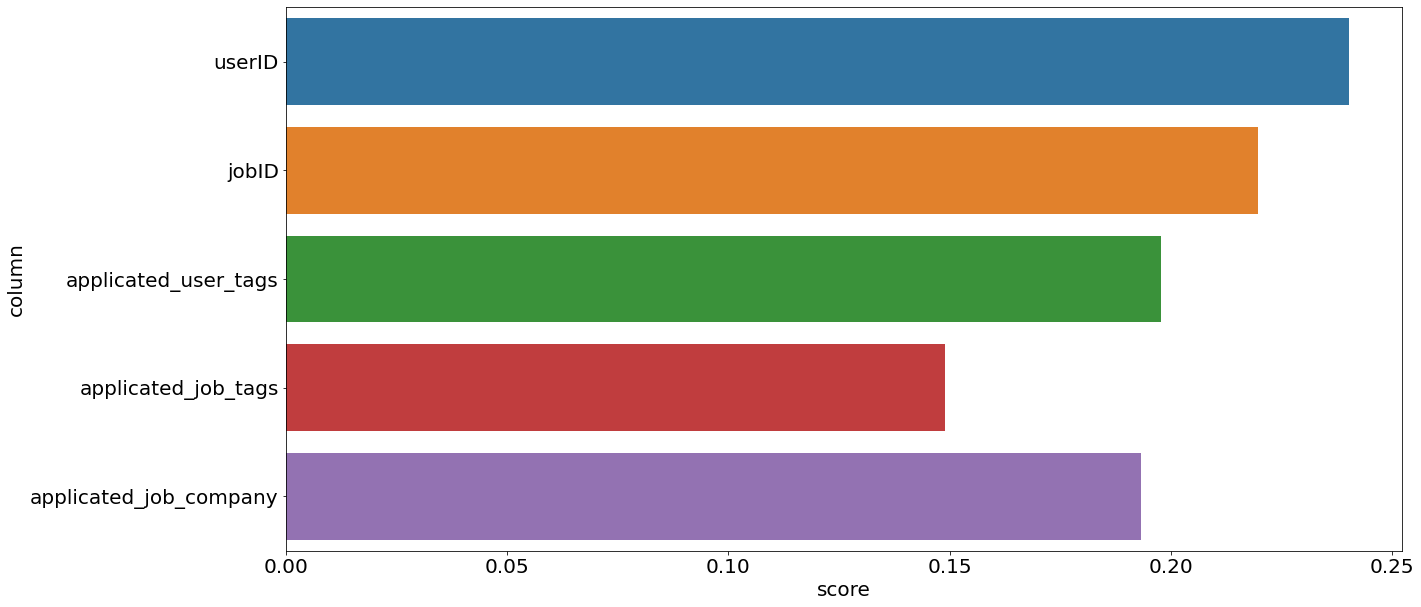

In [337]:
show_feature_importance(ran, X_valid)

In [ ]:
# 대안 3) KNeighborsClassifier => 점수 : 85.42094455852155

In [287]:
pred3 = knn.predict(final_test)

In [288]:
submit4 = pd.DataFrame(pred3, columns=['applied'])
submit4.to_csv('KNeighborsClassifier_submission.csv', header = True, index=False)

In [292]:
# 추가 : 랜덤 포레스트 선택 + feature drop 시도 => 점수 : 84.39425051334702

X_test = test.drop('applicated_job_tags', axis=1)
X_train = train.drop(['applied', 'applicated_job_tags'], axis=1)

y_train = train['applied']

In [293]:
final_test2 = test.drop('applicated_job_tags', axis=1)

In [297]:
# 모델
pred4 = ran.predict(final_test2)

In [299]:
X_valid

,userID,jobID,applicated_user_tags,applicated_job_tags,applicated_job_company
1782,65,527,27,17,170
3917,34,675,57,56,158
221,111,171,92,104,150
2135,169,590,23,42,62
5224,184,182,35,33,222
...,...,...,...,...,...
2543,127,479,65,5,151
1773,112,414,91,5,111
2846,109,423,68,28,211
5799,82,478,16,55,240


In [300]:
X_valid = X_valid.drop('applicated_job_tags', axis=1)

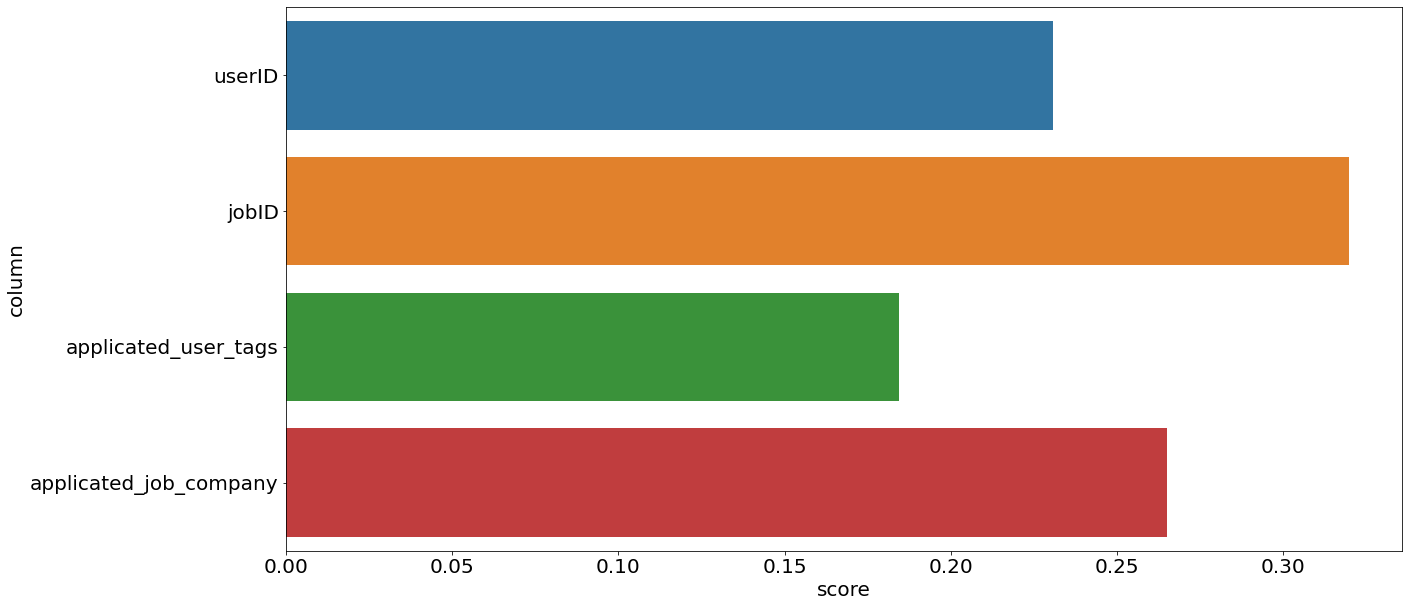

In [301]:
show_feature_importance(ran, X_valid)

In [302]:
submit5 = pd.DataFrame(pred4, columns=['applied'])
submit5.to_csv('Random_Forest_Classifier_feature_drop_submission.csv', header = True, index=False)

# 임포트
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

# 데이터 결합
drop_column = ['applied']

X_data = train.drop(drop_column, axis=1)
y_data = train['applied'].values

X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# 모델 선언 및 훈련 (LightGBM)
lgbm_model = LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=20000,
    objective='regression',
    subsample=1.0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=42,
    n_jobs=-1,
#         max_bin=2*9
)

lgbm_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse', verbose=200,
              early_stopping_rounds=20000)

In [289]:
# feature_importance 확인

def show_feature_importance(model, data):
    df=pd.DataFrame({'column':list(data.columns),
              'score':list(model.feature_importances_),
             })
    plt.figure(figsize=(20,10))
    sns.barplot(x="score", y="column", data=df)
    plt.yticks(size=20)
    plt.xticks(size=20)
    plt.xlabel('score', size=20)
    plt.ylabel('column', size=20)
    plt.show()

show_feature_importance(lgbm_model, X_valid)

In [166]:
submit = pd.read_csv('sample_output_job.csv')

In [167]:
submit

,applied
0,0
1,1
2,0
3,1
4,0
5,1
6,0
7,1


In [168]:
final_test = test # 변수 제거했으면 적용

In [169]:
final_test

,userID,jobID,applicated_user_tags,applicated_job_tags,applicated_job_company
0,180,157,10,97,193
1,121,420,88,71,168
2,29,252,44,97,111
3,138,578,16,5,61
4,166,213,31,63,227
...,...,...,...,...,...
2430,3,110,16,33,62
2431,116,540,52,64,223
2432,162,351,70,27,130
2433,116,448,52,73,254


pred = lgbm_model.predict(final_test)

#submit2['applied'] = pred
#submit2.to_csv('lgbm_model_submission.csv', index=False)